<a href="https://colab.research.google.com/github/around-star/Rnn_Sequence/blob/master/Rnn_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SEQUENCE PREDICTION OF SIN CURVE USING RNN**

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class set_up_batches():
  def __init__(self,x_min,x_max,num_of_points):
    self.x_min=x_min
    self.num_of_points=num_of_points
    self.resolution=(x_max - x_min)/num_of_points
    self.x_data=np.linspace(x_min,x_max,num_of_points)
    self.y_true=np.sin(self.x_data)

  def next_batch(self,time_steps):
    rand_start_point=np.random.randint(0,self.num_of_points-time_steps,1)
    time_stamp_data=np.linspace(rand_start_point,rand_start_point+time_steps,time_steps+1)*self.resolution
    batch=[self.x_min+i for i in time_stamp_data]
    y_true=np.sin(batch)
    return y_true[:-1],y_true[1:],batch

In [0]:
time_steps=30

In [0]:
data=set_up_batches(90,100,200)
train_batch,y_true,x_batch=data.next_batch(time_steps)

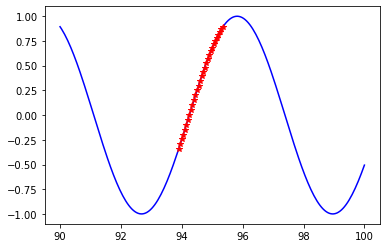

In [0]:
plt.plot(data.x_data,data.y_true,'b-')
plt.plot(x_batch[:-1],train_batch,'r*')
plt.show()

In [0]:
def Rnn(rnn_units):
  return tf.keras.layers.SimpleRNN(rnn_units,activation='sigmoid',recurrent_initializer='glorot_uniform',return_sequences=True)


In [0]:
def build_model(rnn_units):
  model=tf.keras.Sequential([
  Rnn(rnn_units)
  ])
  return model

**UNTRAINED MODEL**

In [0]:
#Untrained Model
untrained_model=build_model(1)

In [0]:
x=np.array(train_batch).reshape(-1,time_steps,1)

In [0]:
x=tf.convert_to_tensor(x,tf.float64)

In [0]:
#Prediction from the Untrained Model
untrained_predict=untrained_model(x)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [0]:
untrained_predict.get_shape()

TensorShape([1, 30, 1])

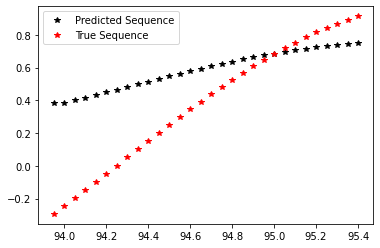

In [0]:
#results of the Untrained Model
plt.plot(x_batch[1:],np.array(untrained_predict).reshape(time_steps),'k*',label='Predicted Sequence')
plt.plot(x_batch[1:],y_true,'r*',label='True Sequence')
plt.legend()
plt.show()

**LOSS FUNCTION AND GRADIENT** 

In [0]:
def compute_loss(y_true,y_pred):
  loss=tf.reduce_mean(tf.square(y_pred-y_true))
  return loss

untrained_loss=compute_loss(y_true,untrained_predict)

In [0]:
#Loss of the Untrained Model
print(untrained_loss)

tf.Tensor(0.10924307, shape=(), dtype=float32)


**TRAINING**

In [0]:
learning_rate=0.001
#Training Model
model=build_model(1)

In [0]:
optimizer=tf.keras.optimizers.Adam(learning_rate)
def train_step():
  with tf.GradientTape() as tape:
    y_pred=model(x)
    #compute loss
    loss=compute_loss(y_true,y_pred)
  #compute gradients
  grads=tape.gradient(loss,model.variables)

  #apply gradients to the optimizer
  optimizer.apply_gradients(zip(grads,model.variables))

In [0]:
iteration=10000
for iterate in range(iteration):
  train_step()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [0]:
y_pred=model(x)

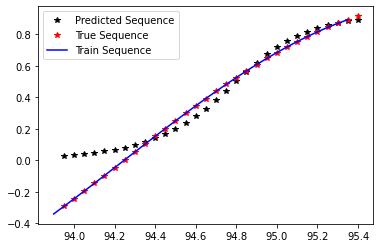

In [0]:
#results of the trained model
plt.plot(x_batch[1:],np.array(y_pred).reshape(time_steps),'k*',label='Predicted Sequence')
plt.plot(x_batch[1:],y_true,'r*',label='True Sequence')
plt.plot(x_batch[:-1],train_batch,'b-',label='Train Sequence')
plt.legend()
plt.show()